In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = os.path.join("..", "results", "tables", "exp6_bert_multicontext_pier.csv")
df = pd.read_csv(csv_path)

df.head()


,ContextType,ContextLabel,TargetModel,Dose,MeanPIER,StdPIER,NumEvalPoints,NumFitPoints,ContextRawSize
0,length,len_long_(>15),BERT,0.0,0.055089,0.159889,100,1000,561
1,length,len_long_(>15),BERT,0.1,0.067756,0.170627,100,1000,561
2,length,len_long_(>15),BERT,0.2,0.093854,0.190586,100,1000,561
3,length,len_long_(>15),BERT,0.3,0.128874,0.148331,100,1000,561
4,length,len_long_(>15),BERT,0.4,0.144561,0.179890,100,1000,561


In [ ]:
def plot_context_type(df, context_type, target_models=None):
    sub = df[df["ContextType"] == context_type].copy()
    if target_models is None:
        target_models = sorted(sub["TargetModel"].unique())

    context_labels = sorted(sub["ContextLabel"].unique())

    n_rows = len(context_labels)
    fig, axes = plt.subplots(n_rows, 1, figsize=(6, 3 * n_rows), sharex=True)

    if n_rows == 1:
        axes = [axes]

    for ax, ctx_label in zip(axes, context_labels):
        df_ctx = sub[sub["ContextLabel"] == ctx_label]
        for tm in target_models:
            df_tm = df_ctx[df_ctx["TargetModel"] == tm].sort_values("Dose")
            if df_tm.empty:
                continue
            ax.plot(
                df_tm["Dose"],
                df_tm["MeanPIER"],
                marker="o",
                label=tm,
            )
        ax.set_title(f"{context_type} = {ctx_label}")
        ax.set_ylabel("Mean PIER")
        ax.grid(True, alpha=0.3)
        ax.legend()

    axes[-1].set_xlabel("Dose (mask ratio)")
    fig.suptitle(f"DISCO Uniqueness vs Dose ({context_type} contexts)", y=1.02)
    plt.tight_layout()
    plt.show()


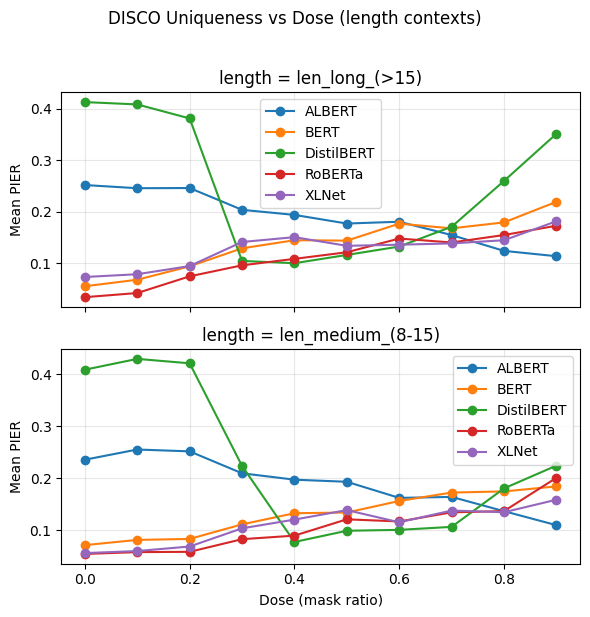

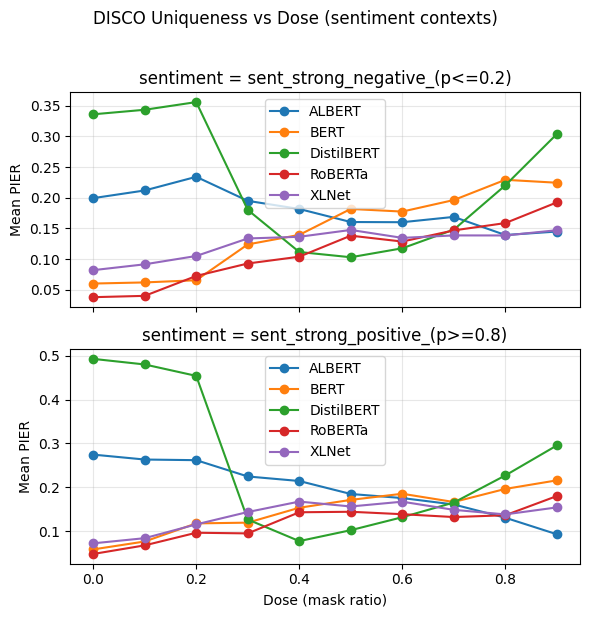

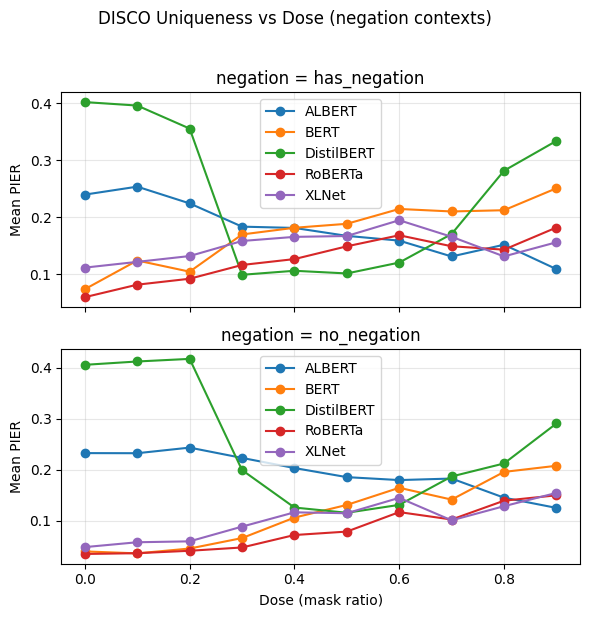

In [ ]:
plot_context_type(df, context_type="length")

plot_context_type(df, context_type="sentiment")

plot_context_type(df, context_type="negation")


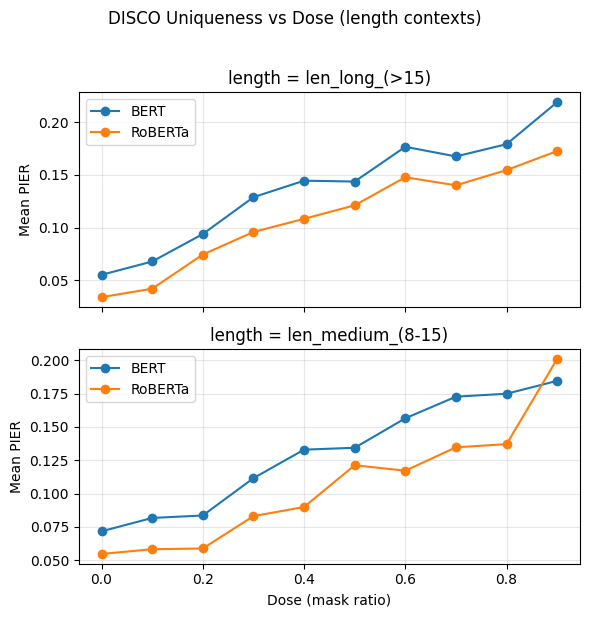

In [ ]:
plot_context_type(df, context_type="length", target_models=["BERT", "RoBERTa"])
